<a href="https://colab.research.google.com/github/KulkarniHrishikesh/Lorenz96/blob/master/Lorentz96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* The one layer model is described by a periodic system of K (k=1,…,K) ODEs:

\begin{equation}
\frac{dX_k}{dt} = \underbrace{-X_{k-1} \left( X_{k-2} - X_{k+1} \right)}_{\text{Advection}} \underbrace{- X_k}_{\text{Diffusion}} + \underbrace{F}_{\text{Forcing}}
\end{equation}

The first term on the right hand side is an advection term, while the second term represents damping. F represents an external forcing term.

* The two layer model is described by adding another periodic variable Y with its own set of ODEs.
The X and Y ODEs are linked through coupling term which is the last term in both equations below. Each X has J Y variables associated with it

\begin{equation}
\frac{dX_k}{dt} = \underbrace{-X_{k-1} \left( X_{k-2} - X_{k+1} \right)}_{\text{Advection}} \underbrace{- X_k}_{\text{Diffusion}} \underbrace{+ F}_{\text{Forcing}} \underbrace{- h c \bar{Y}_k}_{\text{Coupling}}
\end{equation}

\begin{equation}
\frac{1}{c} \frac{dY_{j,k}}{dt} = \underbrace{- b Y_{j+1,k} \left( Y_{j+2,k} - Y_{j-1,k} \right)}_{\text{Advection}} \underbrace{- Y_{j,k}}_{\text{Diffusion}} \underbrace{+ \frac{h}{J} X_k}_{\text{Coupling}}
\end{equation}


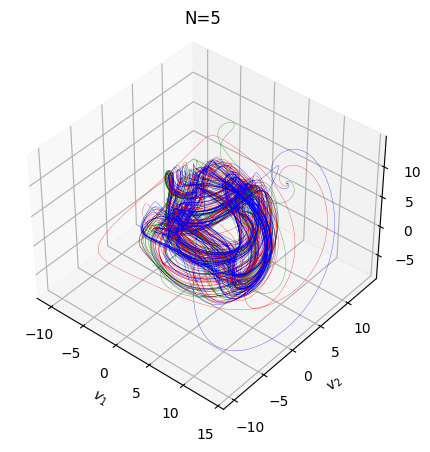

In [4]:
# One layer model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define Lorenz 96 function

# These are our constants
N = 5  # Number of variables
F = 8  # Forcing

def L96(t, v):
    """Lorenz 96 model with constant forcing"""
    # Setting up vector
    dv_dt = 0*v
    # Loops over indices (with operations and Python underflow indexing handling edge cases)
    for i in range(N):
        dv_dt[i] = (v[(i + 1) % N] - v[i - 2]) * v[i - 1] - v[i] + F
    return dv_dt


#define the given range t
t0=0
tn=100
h=0.005

#define number of steps (n)

time = np.arange(t0, tn, h)
v = np.zeros([len(time),N,3], float)
v[0] +=F
v[0,0,0] -= 0.005
v[0,0,1] += 0.005
v[0,0,2] += 0.01

#define RK4
def RK4_step(f,t,y,h):
    k1 = h*f(t,y)
    k2 = h*f(t+0.5*h, y+0.5*k1)
    k3 = h*f(t+0.5*h, y+0.5*k2)
    k4 = h*f(t+h, y+k3)
    return y+(k1+2*k2+2*k3+k4)/6

for i in range(len(time)-1):
    v[i+1] = RK4_step(L96,time[i],v[i],time[i+1]-time[i])

# Plot 3d plot of first 3 coordinates
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=40, azim=-50)
ax.plot3D(v[:,0,0], v[:,1,0], v[:,2,0],'g', lw=0.2)
ax.plot3D(v[:,0,1], v[:,1,1], v[:,2,1],'r', lw=0.2)
ax.plot3D(v[:,0,2], v[:,1,2], v[:,2,2],'b', lw=0.2)
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
ax.set_zlabel('$v_3$')
ax.set_title(f"N={N}")
plt.show()

In [ ]:
# Two layer model

##### Reference:
1. https://raspstephan.github.io/blog/lorenz-96-is-too-easy/#
2. https://stackoverflow.com/questions/65389499/how-to-solve-lorenz-96-model-using-runge-kutta-method